In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#########################################Importar librerías###############################################################
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2

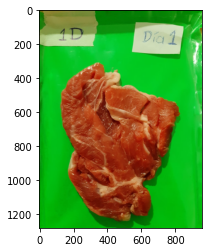

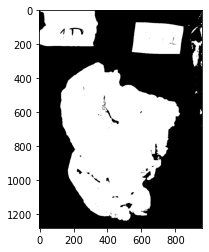

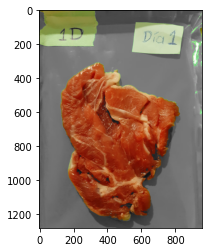

In [ ]:
############################################Funciones útiles#################################################################
#Componente más largo
def get_largest_component( msk ) : 
    n_components , labels , stats , _ = cv2.connectedComponentsWithStats( msk.astype( np.uint8 ) , connectivity = 4 ) 
    max_area = 0
    for i in range( 1 , n_components ) : 
        area = stats[ i , cv2.CC_STAT_AREA ] 
        if area > max_area:
            max_area = area
            msk = labels == i
    return msk
##############################################################################################################################
#obtener imagén
def get_img( img_name ) :
    img = cv2.imread( img_name )
    img = cv2.cvtColor( img , cv2.COLOR_BGR2RGB,img )

    return img
##############################################################################################################################
def get_reds( img ) : 
    hsv = cv2.cvtColor( img , cv2.COLOR_RGB2HSV ) 
    msk = np.bitwise_or( hsv[ :  , :  , 0 ] < 20 , hsv[ :  , :  , 0 ] > 160 ) 
    return msk
##############################################################################################################################

def get_reds2( img ) : 
    
    msk = np.bitwise_or( img[ 0  , :  , : ] >  100, img[ 0  , :  , : ] < 255) 
    return msk
##############################################################################################################################

def blackout( img , msk ) : 
    hsv = cv2.cvtColor( img , cv2.COLOR_RGB2HSV ) 
    h , s , v = cv2.split( hsv ) 
    v[ msk ] = 0
    hsv = cv2.merge(( h , s , v ) ) 
    img = cv2.cvtColor( hsv , cv2.COLOR_HSV2RGB ) 
    return img
###############################################################################################################################
def transform(frame):
    #Obtener el tamaño de la imagen
    nrows, ncols, nch = frame.shape

    #Convertir imagen RGB a HSV
    #bgr = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    #Establecer los rangos donde encontramos los colores azules
    
    #momenos
    #upper = np.array([127, 100, 200])
    #lower = np.array([0, 0, 100])

    #solo verde
    #upper = np.array([255, 255, 70])
    #lower = np.array([0, 0, 0])

    upper = np.array([255, 255, 255])
    lower = np.array([0, 0, 100])

    #Encontrar los pixeles de la imagen azules

    mask = cv2.inRange(frame, lower, upper)
    #frame2 = cv2.dilate(frame,None, iterations=3)
    #Obtener y mostrar la imagen sólo con los píxeles azules
    frame_mask = cv2.bitwise_and(frame, frame, mask=mask)
    plt.figure()
    plt.imshow(mask,cmap='gray')
    plt.show()
    
    # Convertir la imagen de RGB a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = np.copy(frame)
    frame_gray[:, :, 0] = gray
    frame_gray[:, :, 1] = gray
    frame_gray[:, :, 2] = gray
    # Obtener la imagen de grises solo de los pixeles que no son azules
    frame_gray = cv2.bitwise_and(frame_gray, frame_gray, mask=~mask)

    # Sumar la imagen de grises y de azules
    return frame_mask + frame_gray

img = cv2.imread('drive/My Drive/Carnes_Clau/diezmillo1/diezmillo1_dia1.jpeg')

#img = cv2.dilate(img,None, iterations=8)

plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()
img = transform(img)

#img = cv2.dilate(img,None, iterations=3)

plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

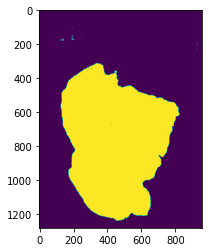

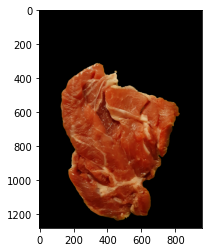

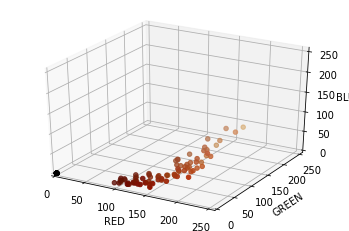

In [ ]:
img_name = 'drive/My Drive/Carnes_Clau/diezmillo1/diezmillo1_dia1.jpeg'
img = get_img( img_name )
reds = get_reds( img )
plt.imshow( reds )
plt.show( )
meat = get_largest_component( reds )
img = blackout( img, ~meat )
plt.imshow( img )
#plt.xticks([])#Para mostrar los ejes
#plt.yticks([])
plt.show( )

####################################################################
#reds = get_reds2(img)
#plt.imshow(reds)
#plt.show()

nrows,ncols,nch = img.shape
Ximg = np.reshape(img,(nrows*ncols,3))
idx = np.random.permutation(len(Ximg))[:200]
Ximg = Ximg[idx,:]


R = Ximg[:,0]
G = Ximg[:,1]
B = Ximg[:,2]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(R, G, B, c=Ximg/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('RED')
ax.set_ylabel('GREEN')
ax.set_zlabel('BLUE')
plt.show()